# CP14. Lepton energy reconstruction in water Cerenkov detectors: NN Regression and Gradient Boosted Regression Trees

In [1]:
# Standard import(s)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### **Exercise 1:**

**Open the CSV file, and feed the data into a pandas.core.frame.DataFrame object.
Carry out the usual sanity checks (pandas.core.frame.DataFrame.head(5)), and determine if data-cleaning is necessary (pandas.core.frame.DataFrame.dropna(inplace = True)). Make sure all variables have the same number of entries before proceeding.
Plot 1D distributions for the all 6 variables listed in Table 1, in log scale (y-axis). Do not normalise the distributions. You can use a loop over the (5 input plus 1 output) features to simplify the code, and you can ignore the units on the x-axis.**

In [2]:
# Load datasets
data_original = pd.read_csv('numu_energy_studies.csv')

In [3]:
data_original.head()

,Unnamed: 0,i,neutrinoE,trueKE,recoE_lookup,total_PMTs_hits2,total_hits2,total_ring_PEs2,pot_length2,hits_pot_length2,recoDWallR2,recoDWallZ2,lambda_max_2,recoDWall_2,recoToWall_2,vtxTrackBias_2
0,0,0,664.541,236.327,22.35380,0.000000,0.023325,0.00000,0.662787,0.003754,0.003389,0.458415,0.650854,0.003389,0.220977,-0.011905
1,1,3,400.551,186.765,2.46971,0.000000,0.010075,0.00000,0.662787,0.001621,0.003389,0.458415,0.405903,0.003389,0.220977,-2.269040
2,2,4,633.353,448.481,409.95400,0.308444,0.080400,0.13070,0.531171,0.016146,0.035389,0.753969,0.537975,0.035389,0.494926,0.024453
3,3,7,845.921,586.647,37.83740,0.000000,0.011950,0.00000,0.918554,0.001388,0.042498,0.083664,0.830098,0.042498,0.805578,-0.007114
4,4,9,1323.140,963.822,1408.07000,0.111333,0.142300,0.26265,0.093641,0.162093,0.616305,0.164307,0.092105,0.358487,0.135845,-0.004307


It looks ok, now we can check if there are any necessary data cleansing by checking if there are any NaNs:

In [4]:
data_original.dropna(inplace=True)

In [5]:
data_original. isna(). sum(). sum() 

0

That looks better! (no NanN)

In [6]:
data_original.count()

Unnamed: 0          163592
i                   163592
neutrinoE           163592
trueKE              163592
recoE_lookup        163592
total_PMTs_hits2    163592
total_hits2         163592
total_ring_PEs2     163592
pot_length2         163592
hits_pot_length2    163592
recoDWallR2         163592
recoDWallZ2         163592
lambda_max_2        163592
recoDWall_2         163592
recoToWall_2        163592
vtxTrackBias_2      163592
dtype: int64

All the variables have the same number of entries, so we can proceed.

In [7]:
# variables we are interested in (from Table 1):
variables = ["total_hits2", "total_ring_PEs2", "recoDWallR2", "recoDWallZ2", "lambda_max_2", "trueKE"]

In [8]:
data_variables = data_original[variables]

In [9]:
# data frame with the variables we are interested in
data_variables.head()

,total_hits2,total_ring_PEs2,recoDWallR2,recoDWallZ2,lambda_max_2,trueKE
0,0.023325,0.00000,0.003389,0.458415,0.650854,236.327
1,0.010075,0.00000,0.003389,0.458415,0.405903,186.765
2,0.080400,0.13070,0.035389,0.753969,0.537975,448.481
3,0.011950,0.00000,0.042498,0.083664,0.830098,586.647
4,0.142300,0.26265,0.616305,0.164307,0.092105,963.822


1D distributions:

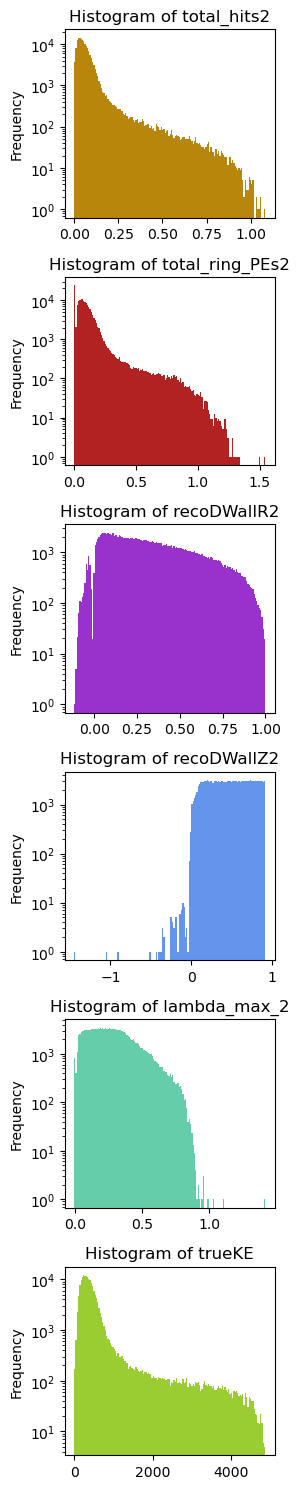

In [10]:
colours = ["darkgoldenrod", "firebrick", "darkorchid", "cornflowerblue", "mediumaquamarine","yellowgreen"]
fig,ax = plt.subplots(6, figsize = (3,15))
for i in range(6):
    ax[i].hist(data_variables[variables[i]],bins=150,log=True, color = colours[i])
    ax[i].set_title("Histogram of " + str(variables[i]))
    ax[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### **Exercise 2:**

**Create a new dataframe containing only the 5 input and 1 output features of interest. Split the new dataset into training (70%) and test (30%) subsets:**

In [11]:
from sklearn import model_selection

In [12]:
data_variables.head()

,total_hits2,total_ring_PEs2,recoDWallR2,recoDWallZ2,lambda_max_2,trueKE
0,0.023325,0.00000,0.003389,0.458415,0.650854,236.327
1,0.010075,0.00000,0.003389,0.458415,0.405903,186.765
2,0.080400,0.13070,0.035389,0.753969,0.537975,448.481
3,0.011950,0.00000,0.042498,0.083664,0.830098,586.647
4,0.142300,0.26265,0.616305,0.164307,0.092105,963.822


In [13]:
input_data = data_variables[["total_hits2", "total_ring_PEs2", "recoDWallR2", "recoDWallZ2", "lambda_max_2"]]
target = data_variables[["trueKE"]]

In [14]:
Answer_to_all_questions = 42
# train-test split of dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split(input_data, target, test_size=0.3, random_state=Answer_to_all_questions) 
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(114514, 5) (114514, 1) (49078, 5) (49078, 1)


**(a) (2 points) Write a function implementing a NN, as we have seen in previous check- points. Use a reasonable number of layers and nodes.
Implement the usual callback hook that exits the NN optimisation when the classification converges.**

In [15]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dropout

In [16]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from sklearn.pipeline import Pipeline

In [17]:
callbacks_ = [
# if we don’t have an increase of the accuracy for 10 epochs, terminate training.   
EarlyStopping(verbose=True, patience=10, monitor="loss"),
# Always make sure that we’re saving the model weights with the best accuracy. 
ModelCheckpoint("model.h5",monitor="loss", verbose=0, save_best_only=True, mode="max")]

In [18]:
batchSize = 500
N_epochs = 50
num_nodes = 20 # per layer
num_inputs = 5

In [25]:
def my_model( ): # create model
    model = Sequential () # regression problem
    model.add(Dense(num_nodes , input_dim=num_inputs , kernel_initializer="normal", activation='relu')) 
    model.add(Dropout(0.05))
    model.add(Dense(num_nodes , input_dim=num_inputs , kernel_initializer="normal", activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(num_nodes , input_dim=num_inputs , kernel_initializer="normal", activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(num_nodes , input_dim=num_inputs , kernel_initializer="normal", activation='relu'))
    model.add(Dropout(0.05))

    model.add(Dense(1 , kernel_initializer="normal"))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam') 
    return model


In [27]:
Answer_to_all_questions = 42 
np.random.seed(Answer_to_all_questions)

estimators = []
estimators.append(("mlp", KerasRegressor(build_fn=my_model , epochs=N_epochs ,batch_size=batchSize, verbose=1))) 
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions , shuffle=True) 
results = cross_val_score(pipeline, train_data, train_target, cv=kfold,
fit_params = {"mlp__callbacks": callbacks_}, scoring="r2") 
print("Result: %.2f %s %.2f" % (results.mean(), u"\u00B1", results.std()))


Epoch 1/50
207/207 [==============================] - 2s 3ms/step - loss: 628285.7344
Epoch 2/50
207/207 [==============================] - 1s 4ms/step - loss: 308061.8845
Epoch 3/50
207/207 [==============================] - 1s 3ms/step - loss: 136280.2396
Epoch 4/50
207/207 [==============================] - 1s 3ms/step - loss: 118962.3669
Epoch 5/50
207/207 [==============================] - 1s 3ms/step - loss: 114057.2885
Epoch 6/50
207/207 [==============================] - 1s 4ms/step - loss: 112793.8244
Epoch 7/50
207/207 [==============================] - 1s 5ms/step - loss: 110603.2948
Epoch 8/50
207/207 [==============================] - 1s 3ms/step - loss: 109491.7558
Epoch 9/50
207/207 [==============================] - 1s 3ms/step - loss: 108006.4260
Epoch 10/50
207/207 [==============================] - 1s 3ms/step - loss: 106143.1405
Epoch 11/50
207/207 [==============================] - 1s 4ms/step - loss: 109947.8867
Epoch 12/50
207/207 [==============================]

The R^2 seems ok,  a change in architecture would increase these value though. 

**(b) (2 points) Use method fit on the model you have implemented in the function, using the training dataset for the fitting, and the test dataset for validation: validation data = (test data, test target).**

In [29]:
model=my_model() 
history=model.fit(train_data,train_target,epochs=N_epochs,batch_size=batchSize,callbacks=callbacks_,validation_data=(test_data, test_target))

Epoch 1/50
230/230 [==============================] - 2s 4ms/step - loss: 620454.6734 - val_loss: 310174.1875
Epoch 2/50
230/230 [==============================] - 1s 3ms/step - loss: 287880.6009 - val_loss: 129818.9688
Epoch 3/50
230/230 [==============================] - 1s 3ms/step - loss: 122462.8056 - val_loss: 103015.3516
Epoch 4/50
230/230 [==============================] - 1s 3ms/step - loss: 112762.3708 - val_loss: 101646.9375
Epoch 5/50
230/230 [==============================] - 1s 3ms/step - loss: 107783.8678 - val_loss: 101102.6172
Epoch 6/50
230/230 [==============================] - 1s 4ms/step - loss: 113344.4861 - val_loss: 100369.9609
Epoch 7/50
230/230 [==============================] - 1s 4ms/step - loss: 115788.3032 - val_loss: 99648.3750
Epoch 8/50
230/230 [==============================] - 1s 3ms/step - loss: 110980.4347 - val_loss: 99128.7734
Epoch 9/50
230/230 [==============================] - 1s 4ms/step - loss: 109754.5969 - val_loss: 98019.7812
Epoch 10/50
2

**Use array History.history[’loss’] to plot the evolution of the loss-function (y-axis in log-scale) as a function of the epoch. You may use function nn utils.lossplot or write your own.**

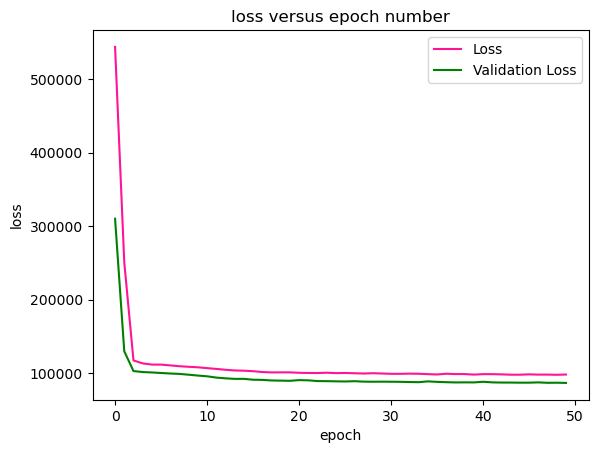

In [32]:
plt.plot(history.history['loss'],color = "deeppink", label='Loss')
plt.plot(history.history['val_loss'], color= "green", label='Validation Loss')
plt.title("loss versus epoch number")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

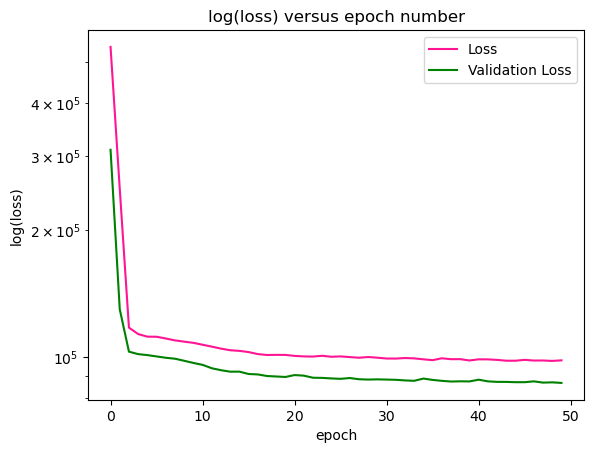

In [36]:
plt.plot(history.history['loss'],color = "deeppinK", label='Loss')
plt.plot(history.history['val_loss'], color= "green", label='Validation Loss')
plt.title("log(loss) versus epoch number")
plt.xlabel("epoch")
plt.yscale("log")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

The losses decrease as expected and I can't spot any overtrainning

**Use method predict to get an array of predicted muon-energy values using test data. Compare it with test target by creating a “predicted” (y-axis) vs.“actual” (x-axis) scatter plot of muon energy values.**

In [38]:
predicted_data = model.predict(test_data) 

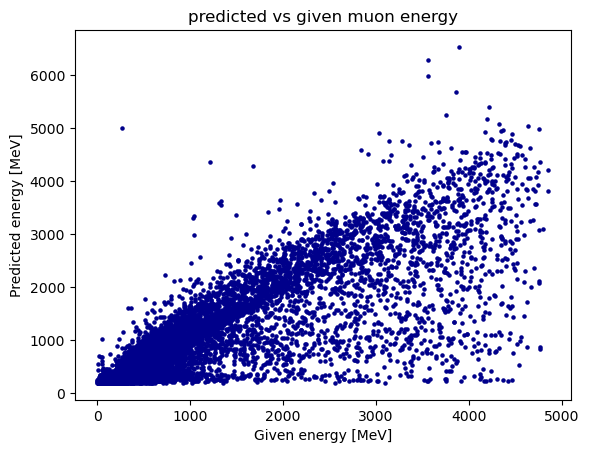

In [46]:
plt.scatter(test_target,predicted_data ,color = "darkblue", s = 5)
plt.title("predicted vs given muon energy")
plt.xlabel("Given energy [MeV]")
plt.ylabel("Predicted energy [MeV]")
plt.show()

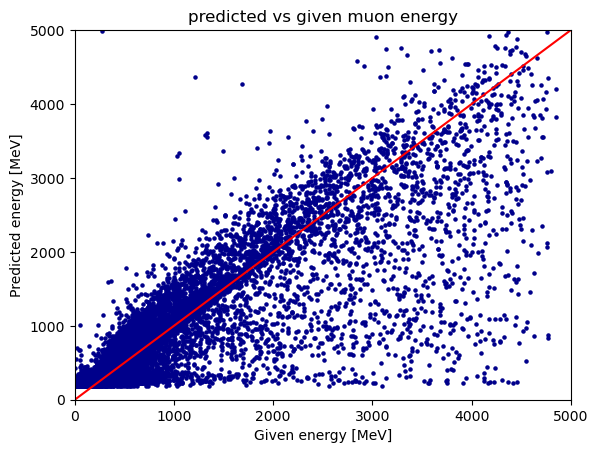

In [53]:
plt.plot([1,5000], [1,5000], color = "red")
plt.scatter(test_target,predicted_data ,color = "darkblue", s = 5)
plt.title("predicted vs given muon energy")
plt.xlabel("Given energy [MeV]")
plt.ylabel("Predicted energy [MeV]")
plt.ylim([0,5000])
plt.xlim([0,5000])

plt.show()

The predicted plot looks ok, centered in the diagonal with mostly not predicte energies (below the diagonal)

### **Exercise 3:**

**(a) (1 point) Try to get a quick result by using a GBRT with the default parameters**

In [49]:
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV

In [55]:

gbr0 = GradientBoostingRegressor(n_estimators=100) 
gbr0.fit(train_data , np.array(train_target).ravel())

GradientBoostingRegressor()

**Use method GradientBoostingRegressor.score to get two R2 scores, one for the train- ing and one for the test datasets. If these two numbers differ significantly, you are prob- ably suffering from overfitting.**

In [56]:
r2_train = gbr0.score(train_data,train_target) 
r2_test = gbr0.score(test_data,test_target)

In [58]:
print("R^2 test" + "    " + str(r2_test))
print("R^2 train" + "    " + str(r2_train))

R^2 test    0.781797050479113
R^2 train    0.7830727956686763


**How do these scores compare with the performance you got for the NN regressor?**

The scores using the gradient boosting regressor are better than the NN regressor so the GBR is better for this task.

**(b) (2 points) We will be now doing a proper optimisation by using a grid-search of the regressor parameters and cross-validation in order to identify the optimal regressor. Use the syntax below to feed the regressor with sets of various parameter values.**

In [61]:
param_grid_ = { "n_estimators":[100], "learning_rate": [0.1, 0.05], "max_depth":[5, 10], "min_samples_leaf":[50,100],}
njobs_=8 # jobs to run in parallel

np.random.seed(Answer_to_all_questions)
gbr = GradientBoostingRegressor()
classifier = GridSearchCV(estimator=gbr, cv=kfold, param_grid=param_grid_,n_jobs=njobs_, verbose=1) 
classifier.fit(train_data , np.array(train_target).ravel()) 
print ("Best estimator:")
print (classifier.best_estimator_)


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best estimator:
GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50)


/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d

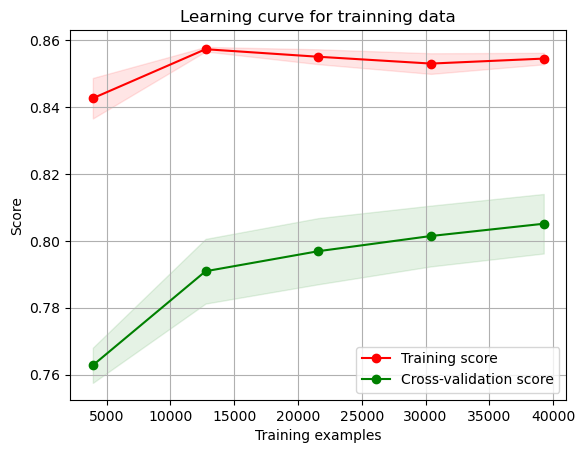

In [68]:
import nn_utils
nn_utils.plot_learning_curve(classifier.best_estimator_, "Learning curve for trainning data", test_data, test_target, ylim=None, cv=None, n_jobs=8,train_sizes=np.linspace(.1, 1.0, 5))
plt.show();

/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d

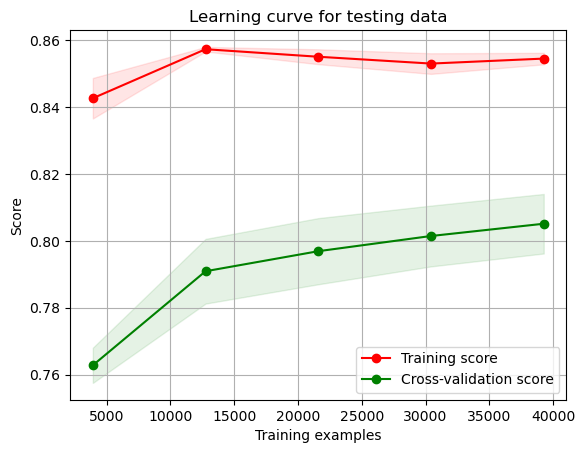

In [69]:
nn_utils.plot_learning_curve(classifier.best_estimator_, "Learning curve for testing data", test_data, test_target, ylim=None, cv=None, n_jobs=8,train_sizes=np.linspace(.1, 1.0, 5)) 
plt.show();

**(c) (2 points) Create a new GBRT regressor with the parameters as determined by classifier.best estimator . Run method cross val score on the test dataset and cross-validation, and determine the R2 score with its standard deviation.**

Getting all the best parameters given by classifier.best.estimator:

In [70]:
rate = classifier.best_estimator_.learning_rate 
depth = classifier.best_estimator_.max_depth
samples = classifier.best_estimator_.min_samples_leaf 
estimator = classifier.best_estimator_.n_estimators 

In [71]:
gbr_model  = GradientBoostingRegressor(max_depth=depth,min_samples_leaf=samples, n_estimators=estimator,learning_rate=rate)

In [74]:
gbr_val = cross_val_score(gbr_model,train_data, train_target, cv = kfold, scoring='r2',n_jobs=8)
print("R^2" + "   " +  str(gbr_val.mean()) + "  " + "+/-"  + "  " + str(gbr_val.std()))

/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d

R^2   0.8061683563162291  +/-  0.012361207880583145


The R^2 value has gone up (before : 0.78), so it is a better GBR that the one we had "optimized" before.

**Use method fit on the training dataset, and predict on the test dataset. Get the array of predicted muon-energy values using test data. Compare it with test target by creating a “predicted” (y-axis) vs. “actual” (x-axis) scatter plot of muon energy values.**

In [75]:
gbr_history = gbr_model.fit(train_data,train_target)

/Users/martadetoro/.conda/envs/daml/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
gbr_predicted = gbr_model.predict(test_data)

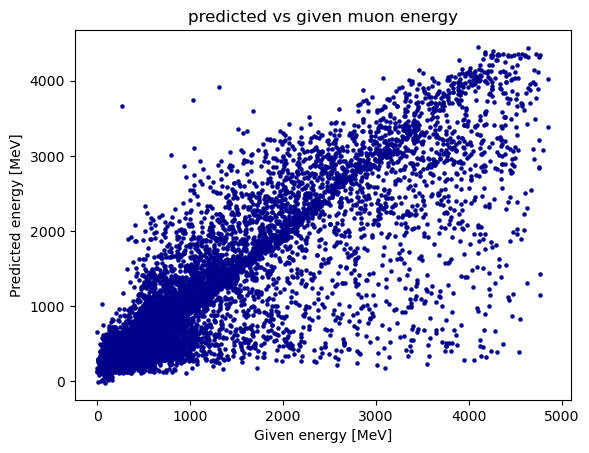

In [77]:
plt.scatter(test_target,gbr_predicted ,color = "darkblue", s = 5)
plt.title("predicted vs given muon energy")
plt.xlabel("Given energy [MeV]")
plt.ylabel("Predicted energy [MeV]")
plt.show()

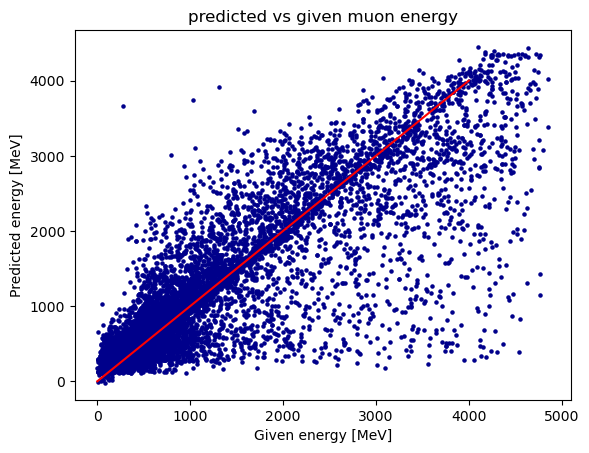

In [79]:
plt.plot([1,4000],[1,4000], color = "red")
plt.scatter(test_target,gbr_predicted ,color = "darkblue", s = 5)
plt.title("predicted vs given muon energy")
plt.xlabel("Given energy [MeV]")
plt.ylabel("Predicted energy [MeV]")
plt.show()

The plot looks better than the one we did before for the Neural network (more points align with the diagonal), so the predictions are better

**Use method feature importances on the optimised regressor to get an insight as to which input features have the greatest impact on the predictive power of the al- gorithm. Order the input features according to their weight. Create a bar chart (matplotlib.pyplot.bar) with the ranked weights of the 5 input features.**

In [108]:
importances = np.array(gbr_model.feature_importances_)
imps_label = np.array(["total_hits2","total_ring_PEs2","recoDWallR2","recoDWallZ2","lambda_max_2"] )

ind = np.argsort(importances)
imp = np.array(importances)[ind]

label = np.array(imps_label)[ind]

print("Sum of importancess should be 1:   " + str(importances.sum()))

print("\n")

for i in range(label.shape[0]):
    print("feature:  "+ str(label[i]) + ", importance:  " + str(imp[i]))



Sum of importancess should be 1:   1.0


feature:  recoDWallR2, importance:  0.028525496538474263
feature:  recoDWallZ2, importance:  0.02926880736047
feature:  lambda_max_2, importance:  0.06856315589434223
feature:  total_hits2, importance:  0.10609174858065297
feature:  total_ring_PEs2, importance:  0.7675507916260605


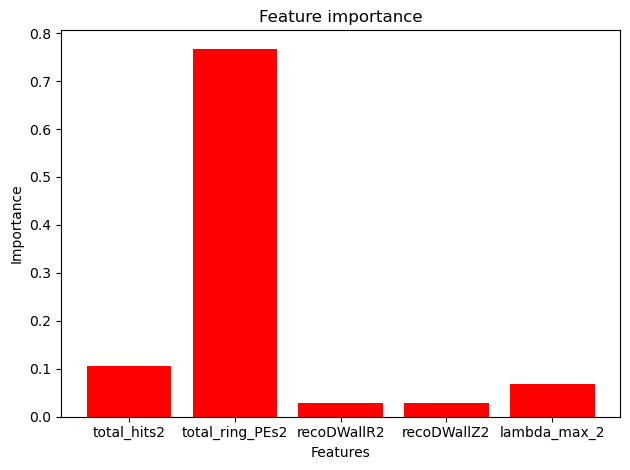

In [107]:
plt.bar(range(5), gbr_model.feature_importances_, color = "red")
plt.xticks(range(5),imps_label)
plt.title("Feature importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Hence, the most important feature for this task is the total_ring_PEs2. The recoDwallZ2 and recoDWallR2 are not that important.

#**END OF NOTEBOOK**